In [139]:
import sys
import os
import collections
from collections import defaultdict
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [140]:
df = pd.read_csv("Profiles.csv")
df

C:\Users\aswat\AppData\Local\Temp\ipykernel_7156\4240517298.py:1: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Profiles.csv")


,Unnamed: 0.1,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,University Of Waterloo,Systems Design Engineering,MS,NaN,Accepted,Website,"(1, 7, 2019)",1.561964e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(10, 7, 2019)",1562742000,NaN
1,1,1,Northeastern University,Electrical Engineering,PhD,F19,Rejected,Website,"(8, 7, 2019)",1.562569e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 7, 2019)",1562742000,Got email today!
2,2,2,The University Of Auckland,Electrical And Electronic Engineering,MS,NaN,Accepted,Website,"(19, 6, 2019)",1.560928e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(9, 7, 2019)",1562655600,Top Student\nIELTS: 7.5\nContacted Supervisor\...
3,3,3,Radford University,Counseling Psychology PsyD.,Other,F19,Accepted,Phone,"(4, 3, 2019)",1.551686e+09,NaN,NaN,NaN,NaN,NaN,NaN,American,"(9, 7, 2019)",1562655600,NaN
4,4,4,University Of Chittagong,Computer Science,MS,NaN,NaN,Other,"(9, 7, 2019)",1.562656e+09,3.2,163.0,168.0,4.0,True,NaN,International,"(9, 7, 2019)",1562655600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485245,485245,64245,Temple University,Clinical Psychology,Other,NaN,Interview,E-mail,"(20, 1, 2006)",1.137744e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 2, 2006)",1139558400,NaN
485246,485246,64246,Temple University,Clinical Psychology,Other,NaN,Interview,E-mail,"(19, 1, 2006)",1.137658e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 2, 2006)",1139558400,NaN
485247,485247,64247,Michigan State University,Communication,PhD,NaN,Accepted,E-mail,"(20, 12, 2005)",1.135066e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 2, 2006)",1139558400,NaN
485248,485248,64248,Ohio State University (OSU),Social Work,MS,NaN,Accepted,Phone,"(16, 11, 2005)",1.132128e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 2, 2006)",1139558400,NaN


In [141]:
df=df.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

In [142]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,University Of Waterloo,Systems Design Engineering,MS,NaN,Accepted,Website,"(1, 7, 2019)",1.561964e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(10, 7, 2019)",1562742000,NaN
1,Northeastern University,Electrical Engineering,PhD,F19,Rejected,Website,"(8, 7, 2019)",1.562569e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 7, 2019)",1562742000,Got email today!
2,The University Of Auckland,Electrical And Electronic Engineering,MS,NaN,Accepted,Website,"(19, 6, 2019)",1.560928e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(9, 7, 2019)",1562655600,Top Student\nIELTS: 7.5\nContacted Supervisor\...
3,Radford University,Counseling Psychology PsyD.,Other,F19,Accepted,Phone,"(4, 3, 2019)",1.551686e+09,NaN,NaN,NaN,NaN,NaN,NaN,American,"(9, 7, 2019)",1562655600,NaN
4,University Of Chittagong,Computer Science,MS,NaN,NaN,Other,"(9, 7, 2019)",1.562656e+09,3.2,163.0,168.0,4.0,True,NaN,International,"(9, 7, 2019)",1562655600,NaN


In [143]:
df.columns = ['university', 'stream', 'program', 'term', 'decision', 'method', 'decdate', 'decdate_ts', 'cgpa', 'greV', 'greQ', 
           'greA', 'is_new_gre', 'gre_subject','citizenship', 'post_data', 'post_timestamp', 'comments']

In [144]:
df.head()

,university,stream,program,term,decision,method,decdate,decdate_ts,cgpa,greV,greQ,greA,is_new_gre,gre_subject,citizenship,post_data,post_timestamp,comments
0,University Of Waterloo,Systems Design Engineering,MS,NaN,Accepted,Website,"(1, 7, 2019)",1.561964e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(10, 7, 2019)",1562742000,NaN
1,Northeastern University,Electrical Engineering,PhD,F19,Rejected,Website,"(8, 7, 2019)",1.562569e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 7, 2019)",1562742000,Got email today!
2,The University Of Auckland,Electrical And Electronic Engineering,MS,NaN,Accepted,Website,"(19, 6, 2019)",1.560928e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(9, 7, 2019)",1562655600,Top Student\nIELTS: 7.5\nContacted Supervisor\...
3,Radford University,Counseling Psychology PsyD.,Other,F19,Accepted,Phone,"(4, 3, 2019)",1.551686e+09,NaN,NaN,NaN,NaN,NaN,NaN,American,"(9, 7, 2019)",1562655600,NaN
4,University Of Chittagong,Computer Science,MS,NaN,NaN,Other,"(9, 7, 2019)",1.562656e+09,3.2,163.0,168.0,4.0,True,NaN,International,"(9, 7, 2019)",1562655600,NaN


In [145]:
df.isnull().sum()

university             0
stream                 8
program                0
term               51408
decision           56221
method              1037
decdate              801
decdate_ts           801
cgpa              371053
greV              361978
greQ              361978
greA              366199
is_new_gre        361978
gre_subject       468369
citizenship        44751
post_data              0
post_timestamp         0
comments          175551
dtype: int64

In [146]:
len(df)

485250

In [147]:
df["decision"].unique()

array(['Accepted', 'Rejected', nan, 'Wait listed', 'Interview'],
      dtype=object)

In [148]:
df=df[(df["decision"] == 'Accepted') | (df["decision"] == "Rejected")]

In [149]:
df

,university,stream,program,term,decision,method,decdate,decdate_ts,cgpa,greV,greQ,greA,is_new_gre,gre_subject,citizenship,post_data,post_timestamp,comments
0,University Of Waterloo,Systems Design Engineering,MS,NaN,Accepted,Website,"(1, 7, 2019)",1.561964e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(10, 7, 2019)",1562742000,NaN
1,Northeastern University,Electrical Engineering,PhD,F19,Rejected,Website,"(8, 7, 2019)",1.562569e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 7, 2019)",1562742000,Got email today!
2,The University Of Auckland,Electrical And Electronic Engineering,MS,NaN,Accepted,Website,"(19, 6, 2019)",1.560928e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(9, 7, 2019)",1562655600,Top Student\nIELTS: 7.5\nContacted Supervisor\...
3,Radford University,Counseling Psychology PsyD.,Other,F19,Accepted,Phone,"(4, 3, 2019)",1.551686e+09,NaN,NaN,NaN,NaN,NaN,NaN,American,"(9, 7, 2019)",1562655600,NaN
5,Georgia Southern University,Speech Language Pathology,MS,F19,Accepted,E-mail,"(2, 7, 2019)",1.562051e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(8, 7, 2019)",1562569200,Accepted off the waitlist. Will be declining
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485239,Yale University,History,Other,NaN,Rejected,E-mail,"(2, 10, 2006)",1.159772e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 2, 2006)",1139558400,NaN
485241,Purdue University,Nuclear Engineering,PhD,NaN,Accepted,Postal Service,"(30, 1, 2006)",1.138608e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 2, 2006)",1139558400,NaN
485247,Michigan State University,Communication,PhD,NaN,Accepted,E-mail,"(20, 12, 2005)",1.135066e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 2, 2006)",1139558400,NaN
485248,Ohio State University (OSU),Social Work,MS,NaN,Accepted,Phone,"(16, 11, 2005)",1.132128e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 2, 2006)",1139558400,NaN


In [150]:
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['decision']= label_encoder.fit_transform(df['decision']) 
  
df['decision'].unique() 

array([0, 1])

In [151]:
dec_list=df["decision"].to_list()
dec_list=[0 if x==1 else 1 for x in dec_list]
df["decision"]=dec_list

In [152]:
df.head()

,university,stream,program,term,decision,method,decdate,decdate_ts,cgpa,greV,greQ,greA,is_new_gre,gre_subject,citizenship,post_data,post_timestamp,comments
0,University Of Waterloo,Systems Design Engineering,MS,NaN,1,Website,"(1, 7, 2019)",1.561964e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(10, 7, 2019)",1562742000,NaN
1,Northeastern University,Electrical Engineering,PhD,F19,0,Website,"(8, 7, 2019)",1.562569e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 7, 2019)",1562742000,Got email today!
2,The University Of Auckland,Electrical And Electronic Engineering,MS,NaN,1,Website,"(19, 6, 2019)",1.560928e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(9, 7, 2019)",1562655600,Top Student\nIELTS: 7.5\nContacted Supervisor\...
3,Radford University,Counseling Psychology PsyD.,Other,F19,1,Phone,"(4, 3, 2019)",1.551686e+09,NaN,NaN,NaN,NaN,NaN,NaN,American,"(9, 7, 2019)",1562655600,NaN
5,Georgia Southern University,Speech Language Pathology,MS,F19,1,E-mail,"(2, 7, 2019)",1.562051e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(8, 7, 2019)",1562569200,Accepted off the waitlist. Will be declining


In [153]:
def normalize_quants(quants):
    q_list = []
    quants = quants.tolist()
    for old in quants:
        if old <= 170:
            q_list.append(old)
            continue
        else:
            old = old/4.7
            if old <=130:
                q_list.append(130)
            else:
                q_list.append(old)
    return q_list

def normalize_verbal(verbal):
    v_list = []
    verbal = verbal.tolist()
    for old in verbal:
        if old <= 170:
            v_list.append(old)
            continue
        else:
            old = old/4.7
            if old <=130:
                v_list.append(130)
            else:
                v_list.append(old)
    return v_list

df['greQ'] = normalize_quants(df['greQ'])
df['greV'] = normalize_verbal(df['greV'])

In [154]:
def normalize_cgpa(cgpa):
    cgpa=cgpa.tolist()
    for i in range(len(cgpa)):
        if cgpa[i]>4:
            cgpa[i]=cgpa[i]*0.4
    return cgpa
df["cgpa"]=normalize_cgpa(df["cgpa"])

In [155]:
univerity_list=df["university"].tolist()
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['university'])
df = encoder.fit_transform(df, df['decision'])
print(df)

        university                                 stream program term  \
0         0.598351             Systems Design Engineering      MS  NaN   
1         0.712946                 Electrical Engineering     PhD  F19   
2         0.594471  Electrical And Electronic Engineering      MS  NaN   
3         0.832214            Counseling Psychology PsyD.   Other  F19   
5         0.726802              Speech Language Pathology      MS  F19   
...            ...                                    ...     ...  ...   
485239    0.291687                                History   Other  NaN   
485241    0.602135                    Nuclear Engineering     PhD  NaN   
485247    0.623410                          Communication     PhD  NaN   
485248    0.608097                            Social Work      MS  NaN   
485249    0.483025        Industrial Engineering -masters   Other  NaN   

        decision          method         decdate    decdate_ts  cgpa  greV  \
0              1         Website 

In [156]:
univ_dic={}
for x,y in zip(univerity_list,df["university"].tolist()):
    if x not in univ_dic.keys():
        univ_dic[x]=y

In [157]:
stream_list=df["stream"].tolist()
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['stream'])
df = encoder.fit_transform(df, df['decision'])
print(df)
stream_dic={}
for x,y in zip(stream_list,df["stream"].tolist()):
    if x not in stream_dic.keys():
        stream_dic[x]=y

        university    stream program term  decision          method  \
0         0.598351  0.640572      MS  NaN         1         Website   
1         0.712946  0.562664     PhD  F19         0         Website   
2         0.594471  0.540446      MS  NaN         1         Website   
3         0.832214  0.607341   Other  F19         1           Phone   
5         0.726802  0.739345      MS  F19         1          E-mail   
...            ...       ...     ...  ...       ...             ...   
485239    0.291687  0.469250   Other  NaN         0          E-mail   
485241    0.602135  0.682692     PhD  NaN         1  Postal Service   
485247    0.623410  0.547486     PhD  NaN         1          E-mail   
485248    0.608097  0.834609      MS  NaN         1           Phone   
485249    0.483025  0.607341   Other  NaN         1          E-mail   

               decdate    decdate_ts  cgpa  greV  greQ  greA is_new_gre  \
0         (1, 7, 2019)  1.561964e+09   NaN   NaN   NaN   NaN        NaN 

In [158]:
program_list=df["program"].tolist()
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['program'])
df = encoder.fit_transform(df, df['decision'])
print(df)


        university    stream   program term  decision          method  \
0         0.598351  0.640572  0.719094  NaN         1         Website   
1         0.712946  0.562664  0.454148  F19         0         Website   
2         0.594471  0.540446  0.719094  NaN         1         Website   
3         0.832214  0.607341  0.766048  F19         1           Phone   
5         0.726802  0.739345  0.719094  F19         1          E-mail   
...            ...       ...       ...  ...       ...             ...   
485239    0.291687  0.469250  0.766048  NaN         0          E-mail   
485241    0.602135  0.682692  0.454148  NaN         1  Postal Service   
485247    0.623410  0.547486  0.454148  NaN         1          E-mail   
485248    0.608097  0.834609  0.719094  NaN         1           Phone   
485249    0.483025  0.607341  0.766048  NaN         1          E-mail   

               decdate    decdate_ts  cgpa  greV  greQ  greA is_new_gre  \
0         (1, 7, 2019)  1.561964e+09   NaN   NaN

In [159]:
program_dic={}
for x,y in zip(program_list,df["program"].tolist()):
    if x not in program_dic.keys():
        program_dic[x]=y

In [160]:
citi_list=df["citizenship"].tolist()
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['citizenship'])
df = encoder.fit_transform(df, df['decision'])
print(df)
citi_dic={}
for x,y in zip(citi_list,df["citizenship"].tolist()):
    if x not in citi_dic.keys():
        citi_dic[x]=y

        university    stream   program term  decision          method  \
0         0.598351  0.640572  0.719094  NaN         1         Website   
1         0.712946  0.562664  0.454148  F19         0         Website   
2         0.594471  0.540446  0.719094  NaN         1         Website   
3         0.832214  0.607341  0.766048  F19         1           Phone   
5         0.726802  0.739345  0.719094  F19         1          E-mail   
...            ...       ...       ...  ...       ...             ...   
485239    0.291687  0.469250  0.766048  NaN         0          E-mail   
485241    0.602135  0.682692  0.454148  NaN         1  Postal Service   
485247    0.623410  0.547486  0.454148  NaN         1          E-mail   
485248    0.608097  0.834609  0.719094  NaN         1           Phone   
485249    0.483025  0.607341  0.766048  NaN         1          E-mail   

               decdate    decdate_ts  cgpa  greV  greQ  greA is_new_gre  \
0         (1, 7, 2019)  1.561964e+09   NaN   NaN

In [161]:
df.head()

,university,stream,program,term,decision,method,decdate,decdate_ts,cgpa,greV,greQ,greA,is_new_gre,gre_subject,citizenship,post_data,post_timestamp,comments
0,0.598351,0.640572,0.719094,NaN,1,Website,"(1, 7, 2019)",1.561964e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.501918,"(10, 7, 2019)",1562742000,NaN
1,0.712946,0.562664,0.454148,F19,0,Website,"(8, 7, 2019)",1.562569e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.588837,"(10, 7, 2019)",1562742000,Got email today!
2,0.594471,0.540446,0.719094,NaN,1,Website,"(19, 6, 2019)",1.560928e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.501918,"(9, 7, 2019)",1562655600,Top Student\nIELTS: 7.5\nContacted Supervisor\...
3,0.832214,0.607341,0.766048,F19,1,Phone,"(4, 3, 2019)",1.551686e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.580095,"(9, 7, 2019)",1562655600,NaN
5,0.726802,0.739345,0.719094,F19,1,E-mail,"(2, 7, 2019)",1.562051e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.588837,"(8, 7, 2019)",1562569200,Accepted off the waitlist. Will be declining


In [162]:
df=df.drop(columns=["is_new_gre","term","method","decdate","decdate_ts","post_data","post_timestamp","comments"], axis=1)

In [163]:
df_subject=df[df["gre_subject"].isna()!=1]
df_general=df[df["gre_subject"].isna()].drop(columns=["gre_subject"],axis=1)

In [164]:
df_general=df_general.dropna()
df_subject=df_subject.dropna()

In [198]:
df_subject.describe()

,university,stream,program,decision,cgpa,greV,greQ,greA,gre_subject,citizenship
count,11674.000000,11674.000000,11674.000000,11674.000000,11674.000000,11674.000000,11674.000000,11674.000000,11674.000000,11674.000000
mean,0.507762,0.519231,0.469180,0.555765,3.699517,156.598929,163.169198,4.281711,782.855919,0.548061
std,0.130568,0.085918,0.062402,0.496902,0.310141,11.236099,8.163107,0.838216,124.447888,0.041433
min,0.112537,0.104754,0.413388,0.000000,1.500000,130.000000,130.000000,0.300000,310.000000,0.482566
25%,0.415144,0.479710,0.454148,0.000000,3.570000,152.000000,160.000000,3.500000,690.000000,0.501918
50%,0.502279,0.533117,0.454148,1.000000,3.800000,160.000000,166.000000,4.000000,780.000000,0.580095
75%,0.602135,0.537532,0.454148,1.000000,3.920000,165.000000,170.000000,5.000000,880.000000,0.580095
max,0.965747,0.941206,0.766048,1.000000,4.000000,170.212766,170.212766,6.000000,990.000000,0.661735


In [180]:
df_general.to_csv("General.csv")
df_subject.to_csv("Subject.csv")

In [187]:
import json
json_data = json.dumps(list(citi_dic.keys()), indent=4)

# Write the JSON data to a file
with open("citi.json", 'w') as json_file:
    json_file.write(json_data)

In [188]:
with open("univ_dic.json", "w") as json_file:
    json.dump(univ_dic, json_file)

with open("program_dic.json", "w") as json_file:
    json.dump(program_dic, json_file)

with open("stream_dic.json", "w") as json_file:
    json.dump(stream_dic, json_file)

with open("citi_dic.json", "w") as json_file:
    json.dump(citi_dic, json_file)



In [179]:
program_dic

{'MS': 0.7190943183326696,
 'PhD': 0.45414759226194473,
 'Other': 0.7660478957063909,
 'MFA': 0.4133883657938862,
 'MBA': 0.7333333286949726,
 'MA': 0.7572253862503731,
 'MEng': 0.6355870684496707}

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

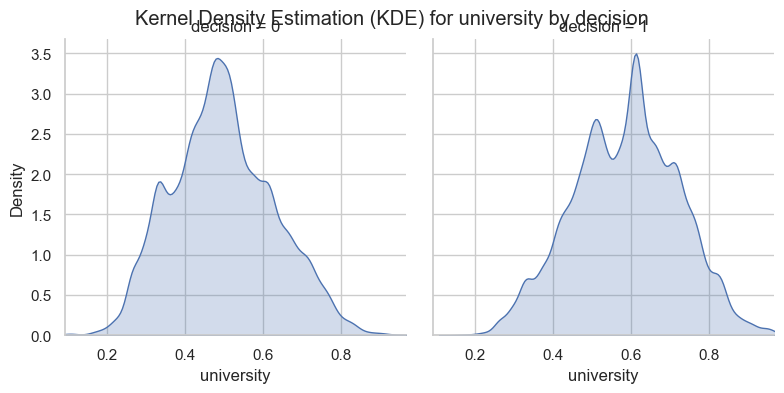

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

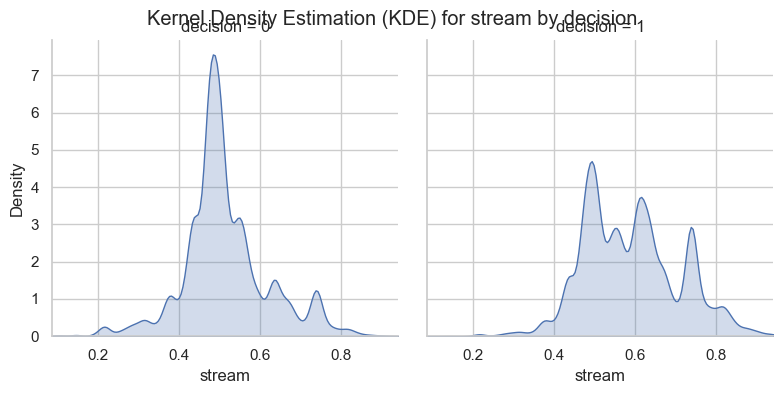

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

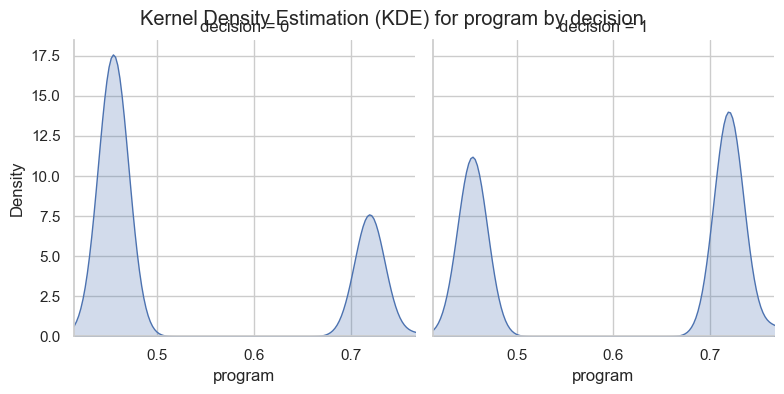

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

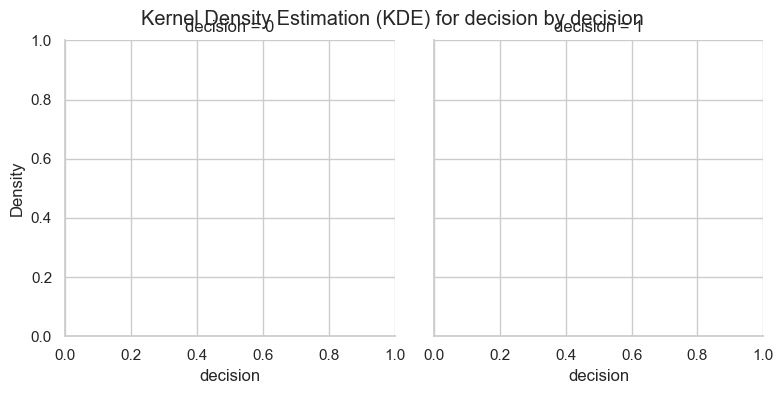

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

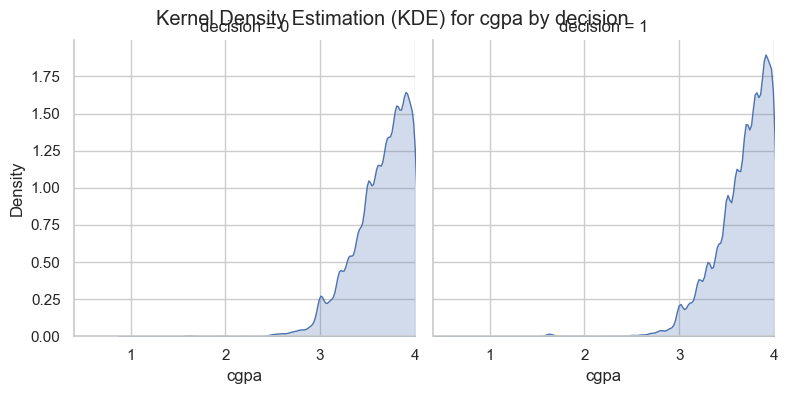

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

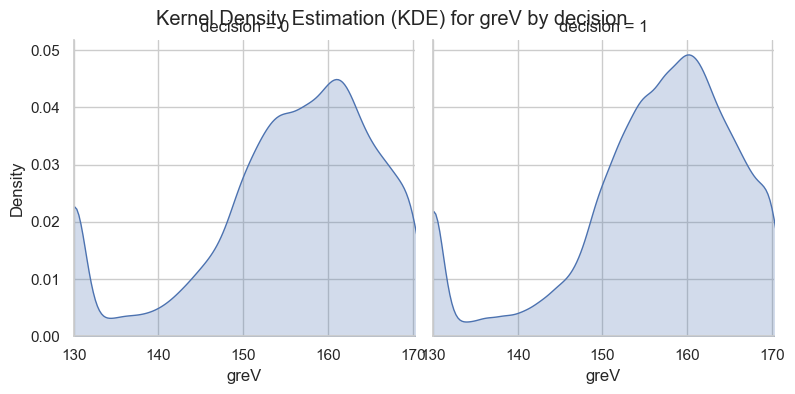

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

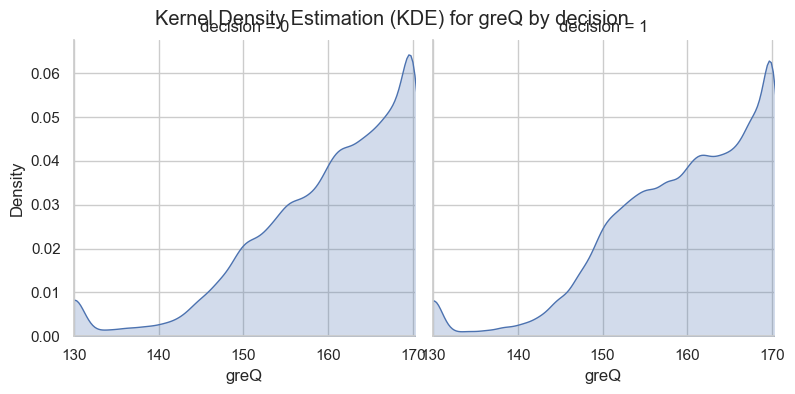

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

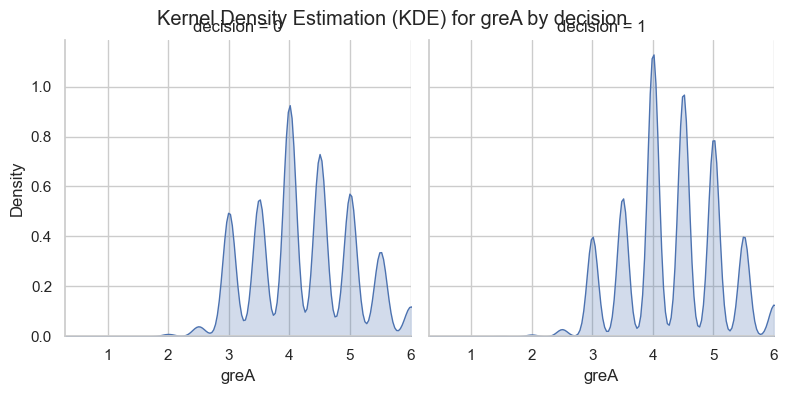

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

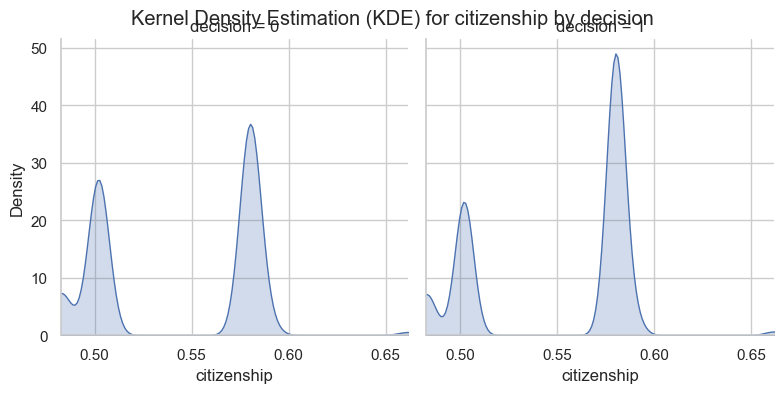

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

continuous_vars = df_general.columns

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for each continuous variable
for var in continuous_vars:
    g = sns.FacetGrid(df_general, col="decision", height=4)
    g.map(sns.kdeplot, var, shade=True)
    g.set(xlim=(df_general[var].min(), df_general[var].max()))
    plt.suptitle(f"Kernel Density Estimation (KDE) for {var} by decision")
    plt.show()

In [166]:
for x in df_general.columns:
    result = stats.ranksums(df_general[df_general['decision'] == 0][x], df_general[df_general['decision'] == 1][x])
    print("Wilcoxon Rank-Sum Test p-value for ",x,":", result.pvalue)

Wilcoxon Rank-Sum Test p-value for  university : 0.0
Wilcoxon Rank-Sum Test p-value for  stream : 0.0
Wilcoxon Rank-Sum Test p-value for  program : 0.0
Wilcoxon Rank-Sum Test p-value for  decision : 0.0
Wilcoxon Rank-Sum Test p-value for  cgpa : 2.2473373527905603e-46
Wilcoxon Rank-Sum Test p-value for  greV : 1.853506098733172e-16
Wilcoxon Rank-Sum Test p-value for  greQ : 9.21644029031367e-20
Wilcoxon Rank-Sum Test p-value for  greA : 2.098748743793678e-62
Wilcoxon Rank-Sum Test p-value for  citizenship : 3.5140299514736805e-124


In [167]:
df_general.reset_index(inplace=True,drop=True)
df_subject.reset_index(inplace=True,drop=True)

# Predictive Model

Classifier: Logistic Regression
Accuracy: 0.7140536677278929
F1 Score: 0.7814253786938167
AUC-ROC: 0.7587857173126985
AUC-PR: 0.8210355947011965


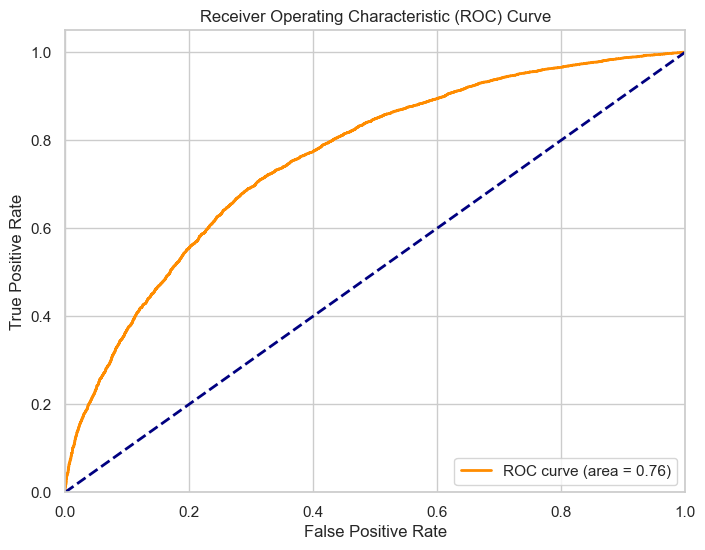

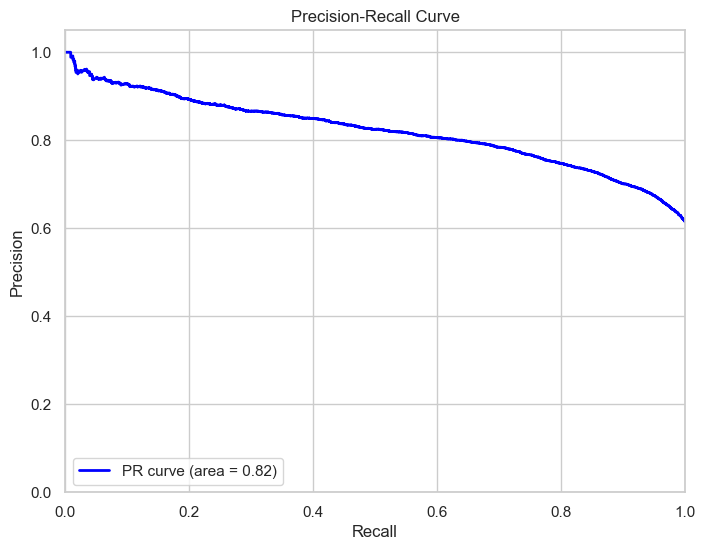

Classifier: AdaBoost
Accuracy: 0.7180819959716718
F1 Score: 0.7811790811437792
AUC-ROC: 0.7756447846800729
AUC-PR: 0.840648010838637


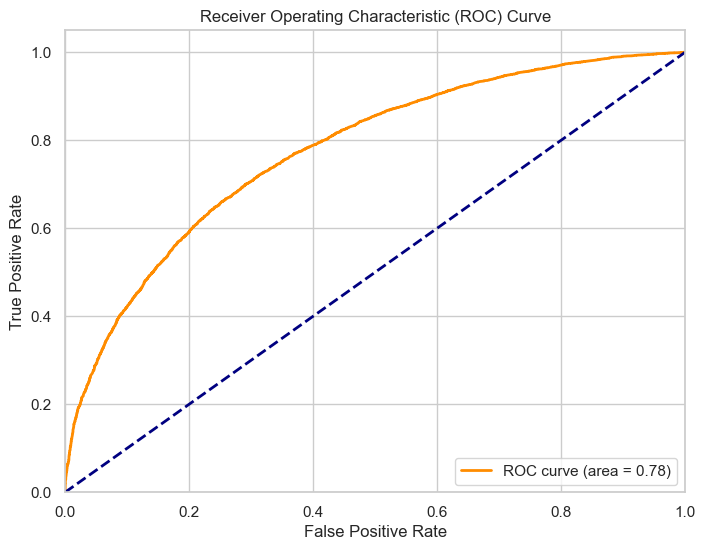

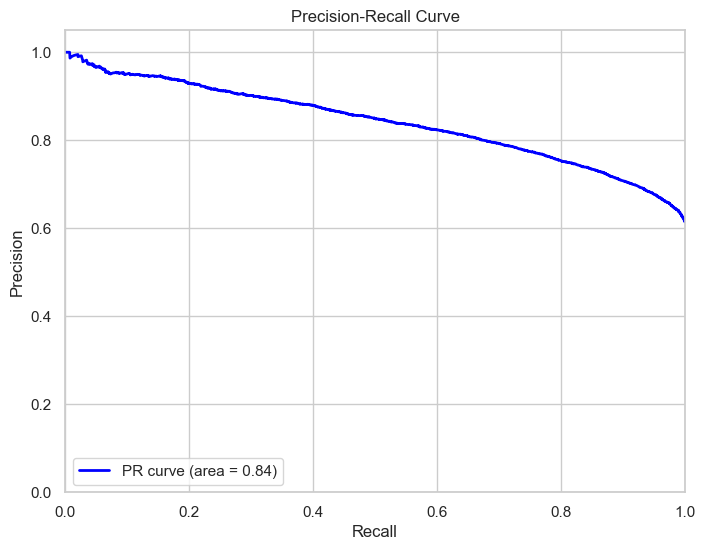

Classifier: Random Forest
Accuracy: 0.7383535832629459
F1 Score: 0.7942994330081218
AUC-ROC: 0.7931609125614546
AUC-PR: 0.8480783062366307


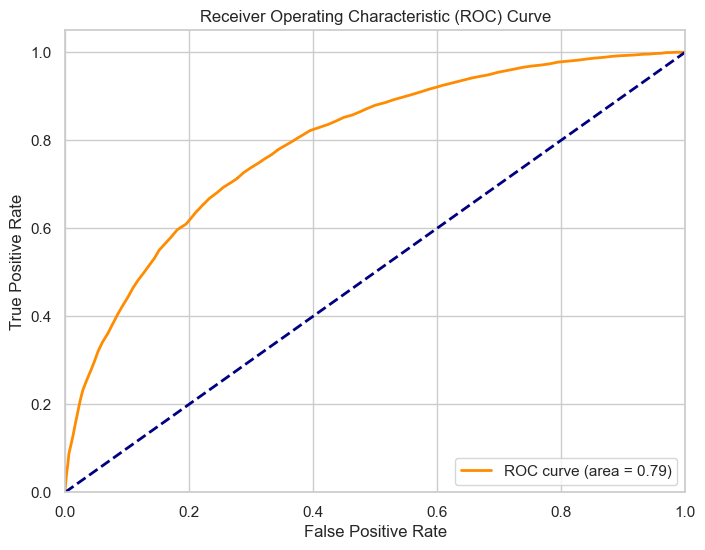

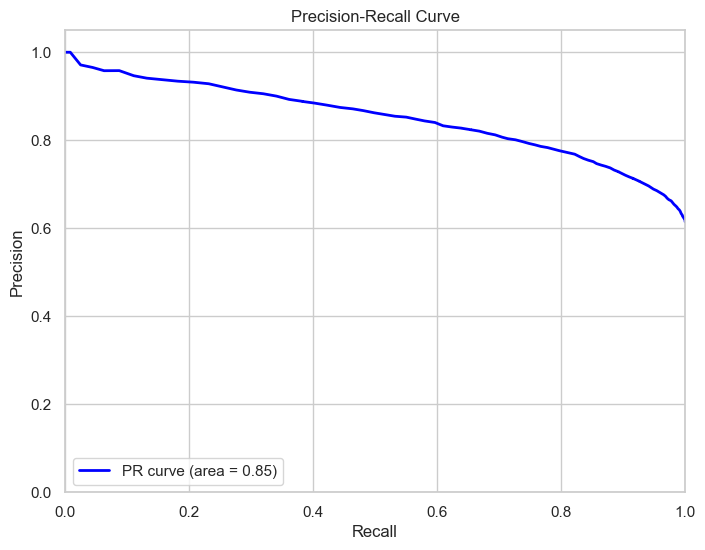

Classifier: XGBoost
Accuracy: 0.7425768306152947
F1 Score: 0.7990056818181818
AUC-ROC: 0.8067220157052977
AUC-PR: 0.8648909690916755


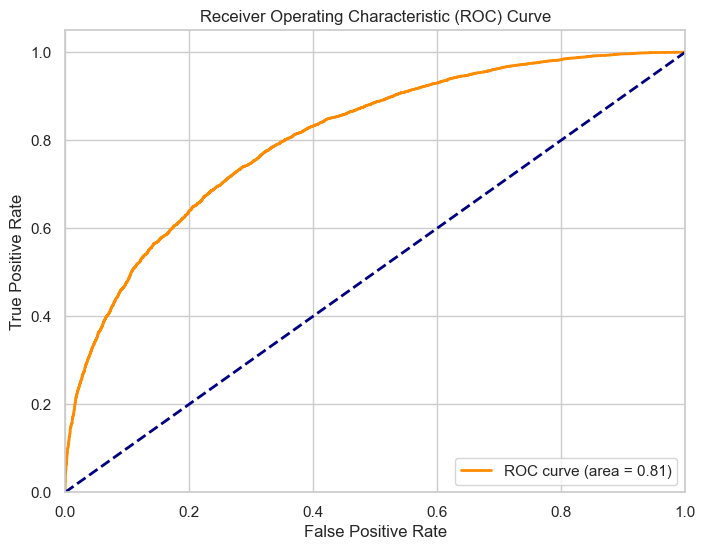

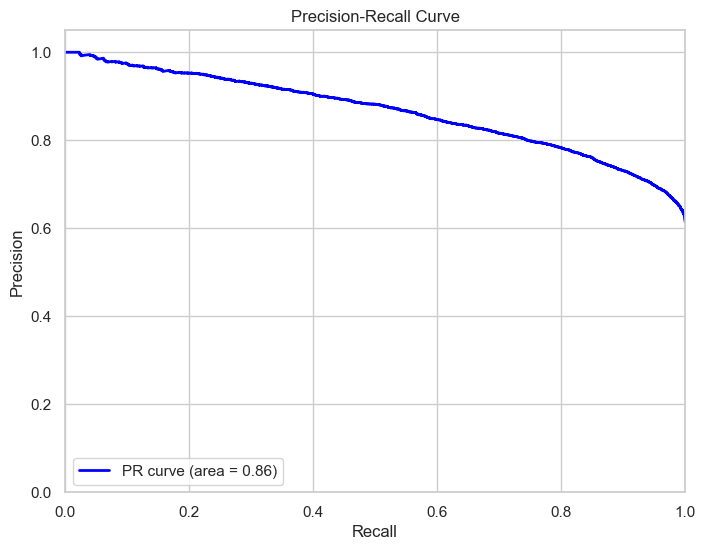

In [189]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = df_general

# Assuming 'target' is your binary target variable and you have predictor variables in 'X'
X = data.drop('decision', axis=1)
y = data['decision']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifiers = [
    ('Logistic Regression', LogisticRegression()),
("AdaBoost", AdaBoostClassifier()),    ('Random Forest', RandomForestClassifier()),
    ("XGBoost", XGBClassifier()),
]

# Iterate through classifiers and evaluate each one
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate ROC and PR curves
    y_prob = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"AUC-ROC: {roc_auc}")
    print(f"AUC-PR: {pr_auc}")
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Plot PR curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()
    
    print("=" * 50)

In [192]:
df_subject.head()

,university,stream,program,decision,cgpa,greV,greQ,greA,gre_subject,citizenship
0,0.581625,0.636655,0.454148,1,4.00,150.0,166.0,3.0,660.0,0.501918
1,0.656325,0.533117,0.454148,0,3.95,164.0,163.0,5.0,750.0,0.580095
2,0.532947,0.533117,0.454148,0,3.88,168.0,167.0,4.5,870.0,0.580095
3,0.810280,0.380056,0.766048,1,4.00,165.0,163.0,5.0,800.0,0.580095
4,0.822394,0.636655,0.454148,1,4.00,161.0,161.0,4.5,720.0,0.580095


Classifier: Logistic Regression
Accuracy: 0.6869379014989293
F1 Score: 0.7293594964827842
AUC-ROC: 0.7428655895435141
AUC-PR: 0.7763425683300926


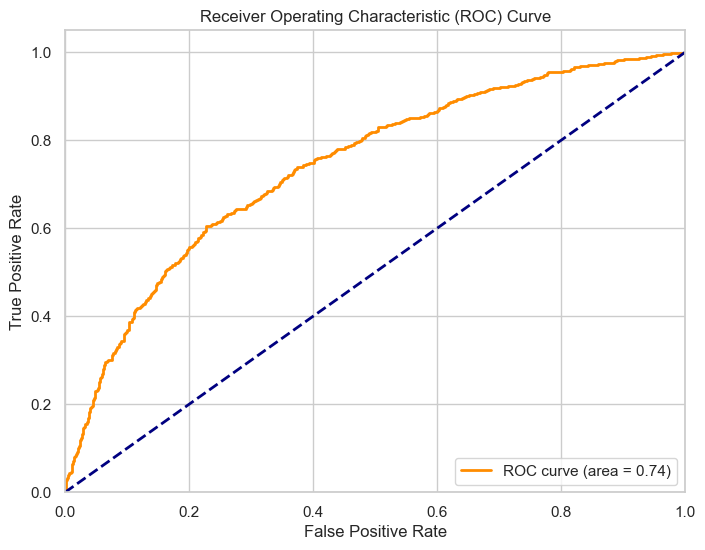

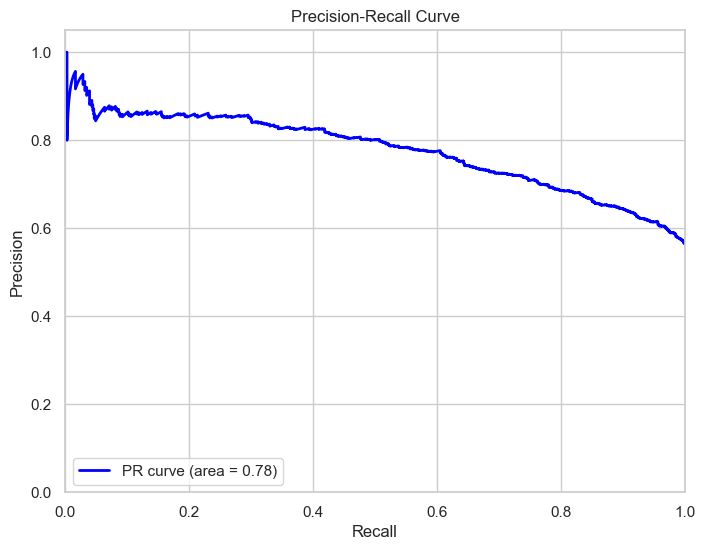

Classifier: AdaBoost
Accuracy: 0.6860813704496788
F1 Score: 0.7247465264739016
AUC-ROC: 0.7421433018736926
AUC-PR: 0.7807033934103471


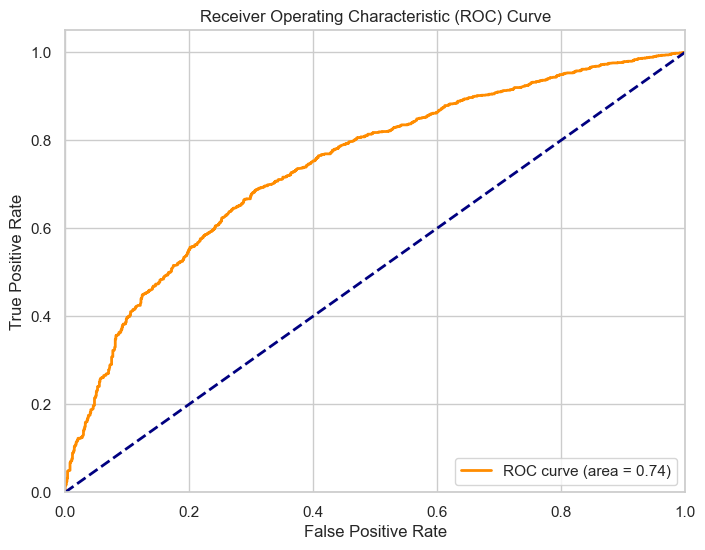

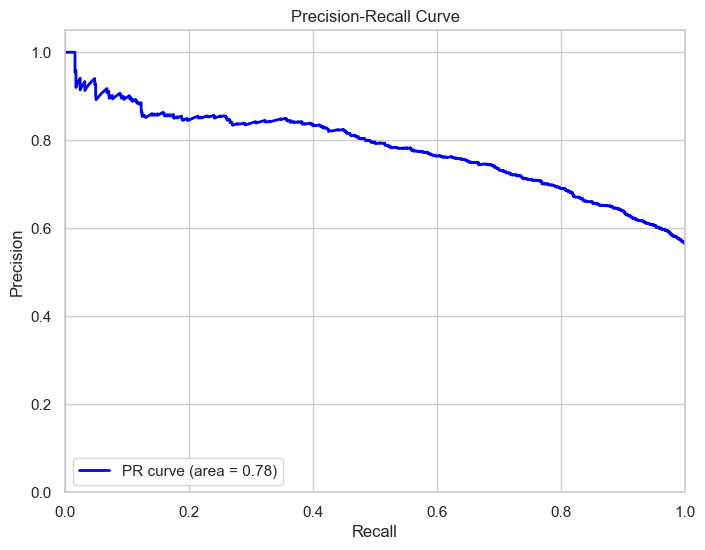

Classifier: Random Forest
Accuracy: 0.6989293361884368
F1 Score: 0.7280464216634429
AUC-ROC: 0.7713009539423096
AUC-PR: 0.8036233571151306


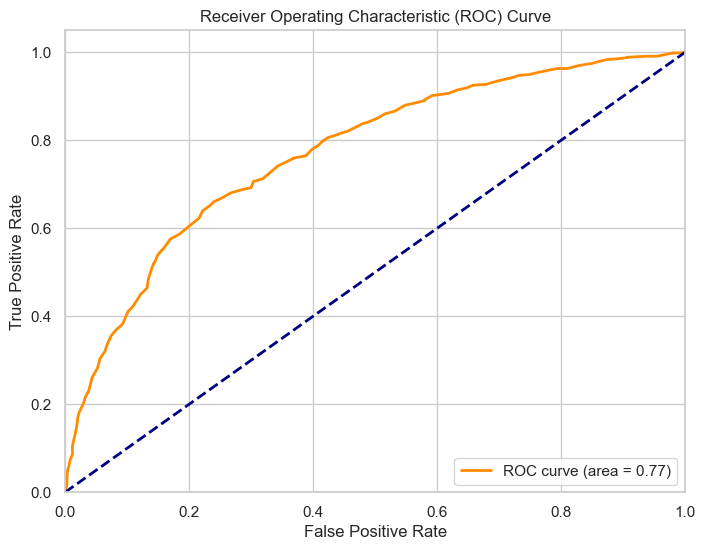

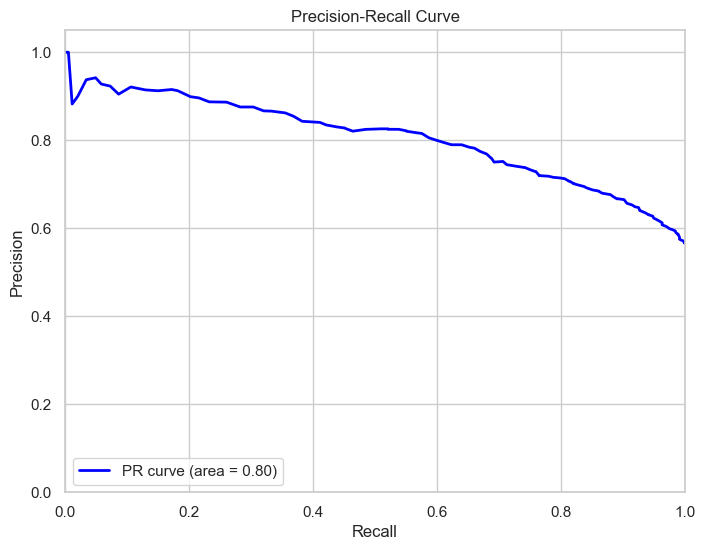

Classifier: XGBoost
Accuracy: 0.7100642398286938
F1 Score: 0.7418985894014487
AUC-ROC: 0.7738563965198799
AUC-PR: 0.8071085525254176


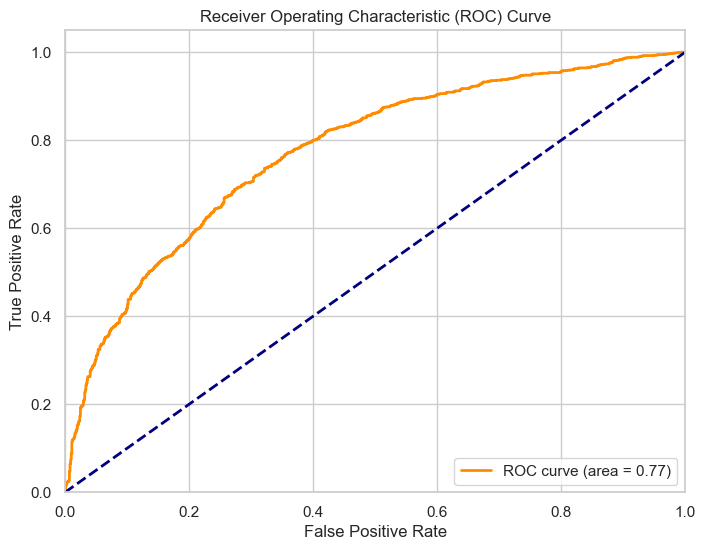

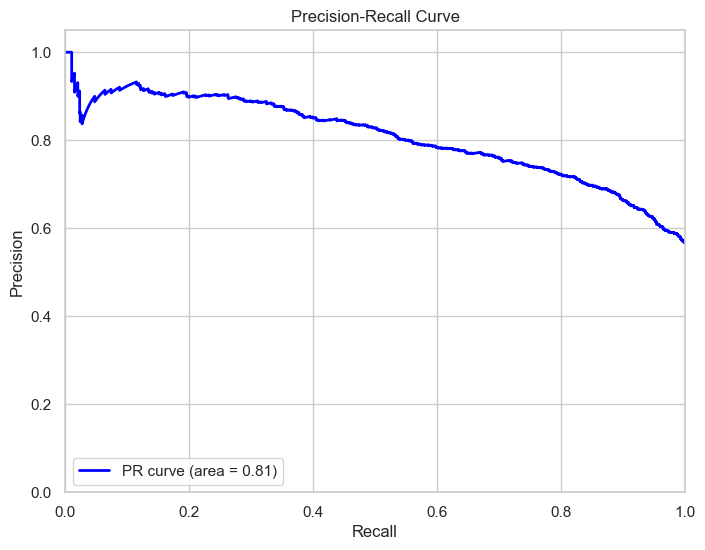

In [202]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

data = df_subject

X = data.drop('decision', axis=1)
y = data['decision']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifiers = [
    ('Logistic Regression', LogisticRegression()),
("AdaBoost", AdaBoostClassifier()),    ('Random Forest', RandomForestClassifier()),
    ("XGBoost", XGBClassifier())]

# Iterate through classifiers and evaluate each one
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate ROC and PR curves
    y_prob = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"AUC-ROC: {roc_auc}")
    print(f"AUC-PR: {pr_auc}")
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Plot PR curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()
    
    print("=" * 50)

In [201]:
classifier.predict([[0.3301361386138614, 0.6366554054054054, 0.7190943183326696, 2, 150, 130, 2.0, 300, 0.5019177676073301]])

array([1])

In [24]:
import math
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets
from numpy.random import permutation
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

# KNN

In [204]:
rev_univ_dic = {value: key for key, value in univ_dic.items()}


In [206]:
rev_univ_dic

{0.5983510011778563: 'University Of Waterloo',
 0.7129455909943715: 'Northeastern University',
 0.5944712718148057: 'University of Texas - Dallas',
 0.8322140566474963: 'Radford University',
 0.7268020968925569: 'West Chester University Of Pennsylvania',
 0.7031802120135492: 'New York University (NYU) - Steinhardt',
 0.4930555555556831: 'New York University ( NYU)',
 0.5410334346504563: 'Baylor University',
 0.5417160045985528: 'University of Memphis',
 0.5816254416961131: 'Ohio State University',
 0.6473429944223783: 'University Of Victoria',
 0.6255506607929515: 'University Of Western Ontario',
 0.7236286919831224: 'Texas A&M University',
 0.5202479338842976: 'University Of California, Los Angeles (UCLA)',
 0.4705128205128205: 'University Of Californa, Los Angeles (UCLA)',
 0.6021348859776807: 'Purdue University',
 0.6074074074065908: 'City University Of New York (CUNY)',
 0.22471914564286555: 'UC San Francisco (UCSF)',
 0.5272753603755799: 'University Of Alberta (U Of A)',
 0.785617

In [207]:
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)


In [208]:
def knn(trainingSet, testInstance, k):
    print(k)
    distances = {}
    sort = {}
    length = testInstance.shape[1]
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)   
        distances[x] = dist[0]
    sorted_d = sorted(distances.items(), key=lambda x: x[1]) 
    neighbors = []
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    classVotes = {}
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=lambda x: x[1], reverse=True)
    return(sortedVotes, neighbors)

In [209]:
first_column = df_general.columns[0]

# Move the first column to the end
df_general = df_general[[col for col in df_general.columns if col != first_column] + [first_column]]

print(df_general)

         stream   program  decision  cgpa        greV        greQ  greA  \
0      0.789565  0.719094         1  3.59  157.000000  147.000000   4.0   
1      0.901899  0.719094         1  3.57  157.000000  151.000000   5.5   
2      0.492633  0.454148         0  3.90  159.000000  170.000000   5.0   
3      0.594471  0.719094         1  3.66  155.000000  167.000000   4.0   
4      0.502445  0.454148         0  3.58  159.000000  160.000000   4.0   
...         ...       ...       ...   ...         ...         ...   ...   
76947  0.526531  0.454148         1  3.30  130.000000  168.085106   3.5   
76948  0.347057  0.454148         0  3.40  146.808511  153.191489   5.0   
76949  0.317128  0.454148         1  3.96  159.574468  161.702128   5.5   
76950  0.347057  0.454148         0  3.90  130.000000  170.212766   4.0   
76951  0.588997  0.454148         1  3.54  130.000000  134.042553   4.5   

       citizenship  university  
0         0.580095    0.703180  
1         0.580095    0.723629  


In [62]:
df_general.loc[0].tolist()

[0.839024388092982,
 0.741711443923631,
 1.0,
 3.59,
 157.0,
 147.0,
 4.0,
 0.6433596204918199,
 0.7501743322289435]

In [213]:
with open("rev_univ_dic.json", "w") as json_file:
    json.dump(rev_univ_dic, json_file)

In [215]:
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# Convert the DataFrame to a list of lists
list_of_lists = df.values.tolist()

# Display the resulting list of lists
print(list_of_lists[0])

[1, 4, 7]


In [211]:
sampletest=[0.839024388092982,
 0.741711443923631,
 1.0,
 3.59,
 157.0,
 147.0,
 4.0,
 0.6433596204918199]
result,neigh= knn(df_general, pd.DataFrame(sampletest), 3)
list1 = []
list2 = []
for i in result:
    list1.append(i[0])
    list2.append(i[1])
for i in list1:
    if i in rev_univ_dic.keys():
        print(rev_univ_dic[i])

3


C:\Users\aswat\AppData\Local\Temp\ipykernel_7156\2877296961.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distance += np.square(data1[x] - data2[x])


University Of North Carolina At Greensboro
University Of Virginia
The University Of Colorado At Boulder


C:\Users\aswat\AppData\Local\Temp\ipykernel_7156\817385631.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  response = trainingSet.iloc[neighbors[x]][-1]
